# Proyecto de Predicción de Pozos Petrolíferos

## Introducción:
Este notebook realiza un análisis de datos para identificar la región más rentable para la apertura de 200 nuevos pozos petrolíferos para OilyGiant. Se utilizan datos geológicos de tres regiones para construir un modelo predictivo y evaluar el riesgo.

## Objetivos:
1. Evaluar el rendimiento del modelo.
2. Calcular el beneficio potencial y analizar el riesgo con bootstrapping.
3. Determinar la región más prometedora para la inversión.

## Importar librerías y análisis exploratorio 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
df1 = pd.read_csv('datasets/geo_data_0.csv')
df2 = pd.read_csv('datasets/geo_data_1.csv')
df3 = pd.read_csv('datasets/geo_data_2.csv')

In [4]:
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
df3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [7]:
def exploration(df):
    print('informacion:')
    print(df.info())
    print('Inspeccion valores faltantes:')
    print(df.isnull().sum())
    print('Vista de duplicados:')
    print(df.duplicated().sum())
    print('Estadisticas descriptivas:')
    print()
    print(df.describe())

In [8]:
exploration(df1)

informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Inspeccion valores faltantes:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Vista de duplicados:
0
Estadisticas descriptivas:

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.

In [9]:
exploration(df2)

informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Inspeccion valores faltantes:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Vista de duplicados:
0
Estadisticas descriptivas:

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.

In [10]:
exploration(df3)

informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Inspeccion valores faltantes:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Vista de duplicados:
0
Estadisticas descriptivas:

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.

Observamos que no existen duplicados ni valores faltantes, sigamos con el análisis exploratorio visualizando gráficos.

In [11]:
#Definimos funciones para observar distribuciones
def hist(df):
    fig, axes = plt.subplots(2,2,figsize=(10,6))
    sns.histplot(data = df, kde=True, x= 'product', ax=axes[0,0])
    axes[0,0].set_title('Distribucion de volumen de reserva miles de barriles')
    sns.histplot(data = df, kde=True, x= 'f0', ax=axes[0,1])
    axes[0,1].set_title('Distribucion de f0')
    sns.histplot(data = df, kde=True, x= 'f1', ax=axes[1,0])
    axes[1,0].set_title('Distribucion de f1')
    sns.histplot(data = df, kde=True, x= 'f2', ax=axes[1,1])
    axes[1,1].set_title('Distribucion de f2')
    plt.tight_layout()
    plt.show()

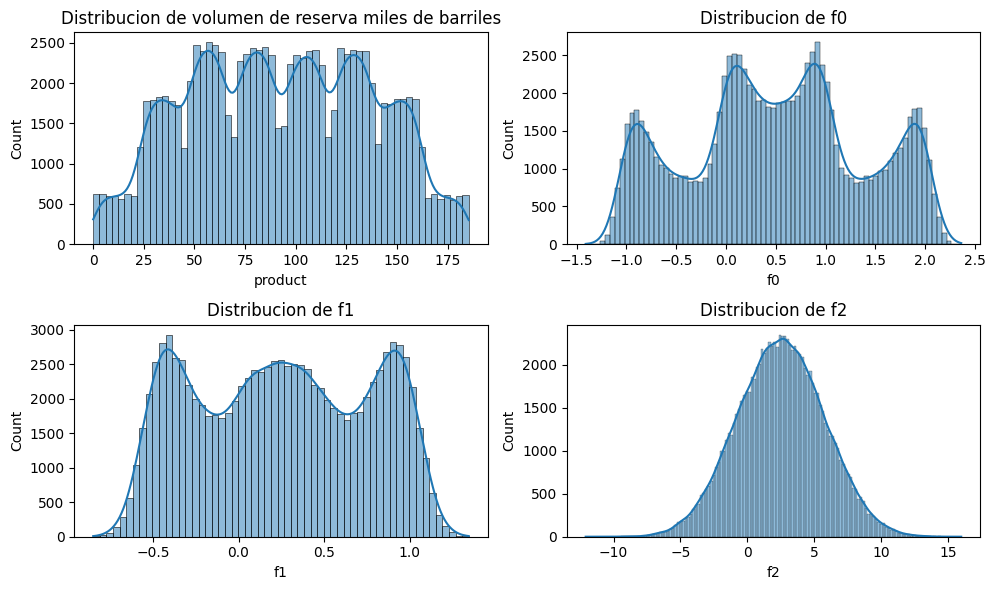

In [12]:
hist(df1)

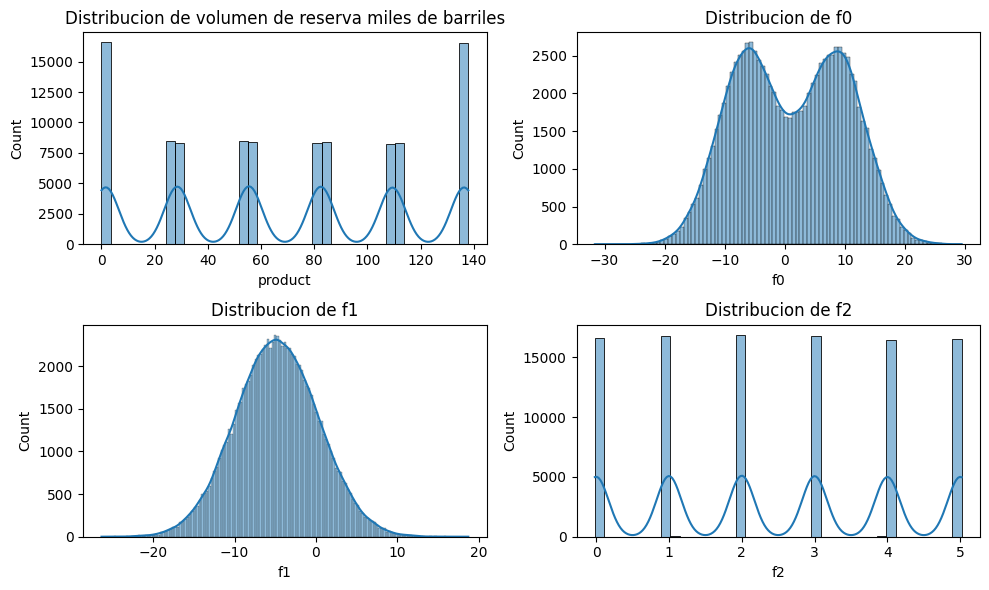

In [13]:
hist(df2)

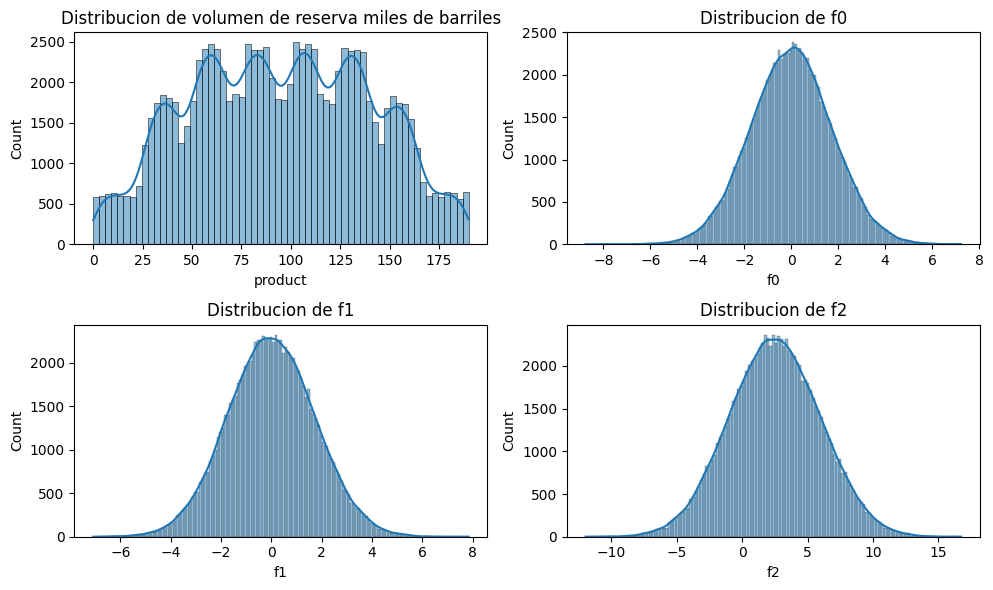

In [14]:
hist(df3)

Luego de observar las distribuciones, solo algunas muestran distribución normal, pero el resto muestra distribuciones multimodales, por lo que no sería una buena opción un modelo de regresión, sin embargo, seguiremos analizando esto con mapas de correlación. 

In [15]:
#Definimos funcion para correlacion
def correla(df, obj):
    b = df.select_dtypes(include=["number"])
    a = b.corr()
    sns.heatmap(a, annot=True, cmap="coolwarm", center = 0)
    plt.show()
    print()
    print(b.corr()[obj].round(3).sort_values(ascending=False))

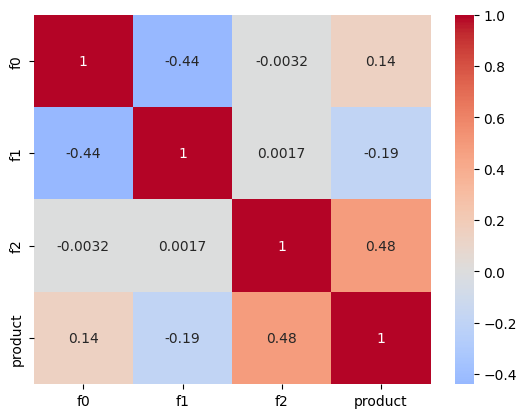


product    1.000
f2         0.484
f0         0.144
f1        -0.192
Name: product, dtype: float64


In [16]:
correla(df1, "product")

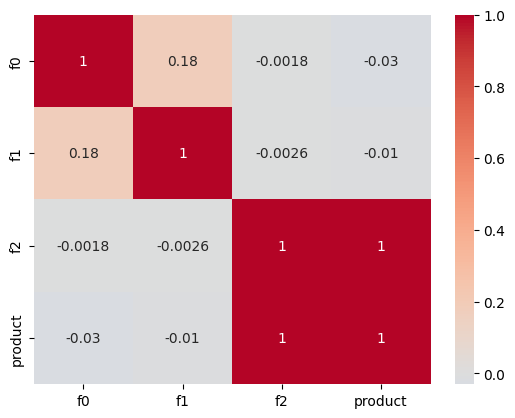


product    1.000
f2         0.999
f1        -0.010
f0        -0.030
Name: product, dtype: float64


In [17]:
correla(df2, "product")

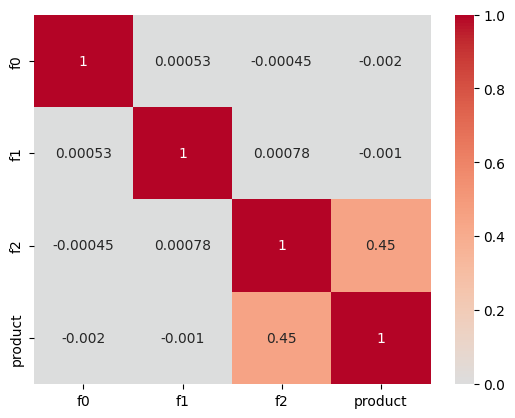


product    1.000
f2         0.446
f1        -0.001
f0        -0.002
Name: product, dtype: float64


In [18]:
correla(df3, "product")

Al observar los mapas de calor, vemos que sí hay correlaciones moderadas entre la variable a predecir y las características predictoras, en especial de f2, por lo que un modelo de regresión puede ser considerado.

## Costruccion y evaluacion del modelo

In [19]:
# Separamos datos en entrenamiento y validacion y calculamos el rmse
def regresion(df, obj, id):
    x = df.drop(columns = [obj, id]) #eliminamos columnas irrelevantes como el id y la variable a predecir
    y = df[obj]
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123, test_size=0.25 ) # dividimos dando un 25% de los datos apra validacion
    
    modelo_regr = LinearRegression() #implementamos la regresion logistica
    modelo_regr.fit(x_train, y_train)
    prediccion = modelo_regr.predict(x_test)
    
    rmse = mean_squared_error(y_test, prediccion, squared=False)  #calculamos el rmse
    
    return rmse, prediccion, y_test

rmse1, prediccion1, y_test1 = regresion(df1, "product", "id")
rmse2, prediccion2, y_test2 = regresion(df2, "product", "id")
rmse3, prediccion3, y_test3 = regresion(df3, "product", "id")

print(f"El rmse para la regresion lineal de region 1 es: {rmse1:.2f}")
print(f"El rmse para la regresion lineal de region 2 es: {rmse2:.2f}")
print(f"El rmse para la regresion lineal de region 3 es: {rmse3:.2f}")

El rmse para la regresion lineal de region 1 es: 37.65
El rmse para la regresion lineal de region 2 es: 0.90
El rmse para la regresion lineal de region 3 es: 40.13


c:\Users\juan6\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\juan6\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\juan6\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Observamos que el modelo se desempeña mejor en la región 2, sin embargo, aún debemos verificar las ganancias para determinar qué pozo elegiremos.

## Calculo de ganancias y riesgo de perdida

In [20]:
# Definir constantes
BUDGET = 100000000  # Presupuesto en dólares
WELLS_TO_DRILL = 200  # Número de pozos a perforar sera el count
INCOME_PER_UNIT = 4500  # Ingreso por unidad de producto (en miles de barriles) sera el count

def ganancia(prediccion,y_test, count):
    predi = pd.Series(prediccion, index = y_test.index)
    indices_sele = predi.sort_values(ascending=False).index[:count]
    selec_test = y_test.loc[indices_sele]
    
    ingreso = selec_test.sum()*INCOME_PER_UNIT
    ganancias = ingreso - BUDGET
    ganancias = ganancias
    
    return ganancias

ganancia1 = ganancia(prediccion1, y_test1, WELLS_TO_DRILL)
ganancia2 = ganancia(prediccion2, y_test2, WELLS_TO_DRILL)
ganancia3 = ganancia(prediccion3, y_test3, WELLS_TO_DRILL)

print(f"Ganancia esperada en la region 1: ${ganancia1:.2f}")
print(f"Ganancia esperada en la region 2: ${ganancia2:.2f}")
print(f"Ganancia esperada en la region 3: ${ganancia3:.2f}")

Ganancia esperada en la region 1: $35346709.17
Ganancia esperada en la region 2: $24150866.97
Ganancia esperada en la region 3: $23703438.63


La región 1 parece ser más prometedora, veremos qué pasa con la técnica de bootstrapping. 

In [21]:
#Calculamos beneficios y posibles riesgo de perdida
def boot_ganancia(prediccion,y_test, n_bootstraps):
    state = np.random.RandomState(1234)  # Control de aleatoriedad
    profits = []
    prediccion = pd.Series(prediccion, index=y_test.index)
    for boot in range(n_bootstraps):
        subconjunto = y_test.sample(n = 5000, replace=True, random_state=state.randint(0, 10000))
        subconju_predic = prediccion.loc[subconjunto.index]
        profit = ganancia(subconju_predic, subconjunto, WELLS_TO_DRILL)
        profits.append(profit)
        
        
    profits = pd.Series(profits)
    mean_profits = profits.mean()
    quantile_low = profits.quantile(0.025)
    quantile_up = profits.quantile(0.975)
    
    prob_perdida = (profits < 0).mean()  # Porcentaje de veces que la ganancia es negativa
    
    return mean_profits, quantile_low, quantile_up, prob_perdida

mean_profit1, quantile_low1, quantile_up1, risk1 = boot_ganancia(prediccion1,y_test1, 2000)
mean_profit2, quantile_low2, quantile_up2, risk2 = boot_ganancia(prediccion2,y_test2, 2000)
mean_profit3, quantile_low3, quantile_up3, risk3 = boot_ganancia(prediccion3,y_test3, 2000)

print(f"Beneficio promedio esperada en la region1: ${mean_profit1:.2f}, IC 95%: (${quantile_low1:.2F}, ${quantile_up1:.2F}), Riesgo de pérdida: {risk1:.2%}")
print(f"Beneficio promedio esperada en la region2: ${mean_profit2:.2f}, IC 95%: (${quantile_low2:.2f}, ${quantile_up2:.2f}), Riesgo de pérdida: {risk2:.2%}")
print(f"Beneficio promedio esperada en la region3: ${mean_profit3:.2f}, IC 95%: (${quantile_low3:.2f}, ${quantile_up3:.2f}), Riesgo de pérdida: {risk3:.2%}")

Beneficio promedio esperada en la region1: $50304288.99, IC 95%: ($38718395.92, $63530385.63), Riesgo de pérdida: 0.00%
Beneficio promedio esperada en la region2: $48927102.84, IC 95%: ($37807462.33, $61396127.06), Riesgo de pérdida: 0.00%
Beneficio promedio esperada en la region3: $42771931.88, IC 95%: ($30769343.86, $56259625.32), Riesgo de pérdida: 0.00%


Con el análisis de bootstrapping, la región 1 se presenta como la opción más prometedora en términos de beneficio esperado y bajo riesgo de pérdida. 

## Conclusiones

🔹 Con base en los resultados, la Región 1 es la mejor opción porque:

✅ Genera el mayor beneficio esperado.

✅ Tiene un intervalo de confianza superior al de otras regiones.

✅ No tiene riesgo de pérdida (0%).


🔹 Sin embargo, la Región 2 es una alternativa segura porque:

✅ Su modelo es más preciso (RMSE más bajo).

✅ También tiene riesgo de pérdida del 0%.

✅ Si se busca menor incertidumbre en las predicciones, puede ser una mejor opción.


🔹 No recomendamos perforar en la Región 3, ya que:

❌ Es la menos rentable.

❌ Su intervalo de confianza es el más bajo.

❌ Tiene mayor incertidumbre en las predicciones (RMSE alto).